哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
data_a = pd.read_csv('A_lvr_land_A.csv')
data_b = pd.read_csv('B_lvr_land_A.csv')
data_e = pd.read_csv('E_lvr_land_A.csv')
data_f = pd.read_csv('F_lvr_land_A.csv')

In [3]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
data_a = data_a.iloc[1:]
data_b = data_b.iloc[1:]
data_e = data_e.iloc[1:]
data_f = data_f.iloc[1:]
data_a.head(20)

,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
1,文山區,車位,臺北市文山區木柵路二段９２號、興隆路四段９１號等地下二層,0.34,商,NaN,NaN,1110804,土地1建物1車位1,地下二層,...,坡道平面,0.0,1905106,雙方約定土地增值稅5106元，約定由買方繳納，故一併計入成交總價款，特此載明。車位編號:80...,RPQNMLKKQHHGFAA07DA,0.00,0.00,0.00,有,1.0
2,文山區,車位,臺北市文山區木柵路二段９２號、興隆路四段９１號等地下一層,0.34,商,NaN,NaN,1110803,土地1建物1車位1,地下一層,...,坡道平面,0.0,2005131,雙方約定土地增值稅5131元，約定由買方繳納，故一併計入成交總價款，特此載明。車位編號:26...,RPRNMLKKQHHGFAA17DA,0.00,0.00,0.00,有,2.0
3,南港區,土地,新光段二小段187地號,0.26,住,NaN,NaN,1110804,土地4建物0車位0,NaN,...,NaN,0.0,0,NaN,RPPNMLTJQHHGFDA08DA,0.00,0.00,0.00,無,NaN
4,北投區,房地(土地+建物)+車位,臺北市北投區關渡路４６號八樓,34.62,住,NaN,NaN,1110802,土地2建物1車位4,八層,...,坡道機械,91.0,0,外牆挑空補板陽台外推；其他增建；,RPXOMLSJQHHGFEA98DA,138.94,13.32,18.15,有,3.0
5,士林區,土地,三玉段四小段491-2地號,4.82,住,NaN,NaN,1110803,土地2建物0車位0,NaN,...,NaN,0.0,0,491地號價款為貳仟伍佰元整，491-2地號價款為壹拾玖萬柒仟伍佰元整每人出售價格各20萬元...,RPQOMLTJQHHGFEA38DA,0.00,0.00,0.00,無,NaN
6,松山區,土地,西松段一小段694-5地號,17.61,都市：其他:道路用地(公共設施用地)。58/8/27,NaN,NaN,1110805,土地1建物0車位0,NaN,...,NaN,0.0,0,包含公共設施保留地用地；,RPPPMLRJPHHGFDA08EA,0.00,0.00,0.00,無,4.0
7,文山區,房地(土地+建物),臺北市文山區羅斯福路五段２６號,14.29,商,NaN,NaN,1110804,土地1建物1車位0,一層,...,NaN,0.0,0,持分買賣。親友、員工、共有人或其他特殊關係間之交易；夾層；,RPWNMLLKQHHGFAA77DA,27.03,46.70,0.00,無,NaN
8,士林區,房地(土地+建物),臺北市士林區社子街１１２巷１８號二樓,10.83,都市：其他:第三之二種住宅區(依都市計畫說明書圖規定辦理)。,NaN,NaN,1110804,土地2建物1車位0,二層,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易；,RPQOMLKKQHHGFEA57DA,27.06,0.00,0.00,無,NaN
9,北投區,土地,文林段三小段303-1地號,11.61,都市：其他:道路用地(公共設施用地)。65/7/8,NaN,NaN,1110804,土地1建物0車位0,NaN,...,NaN,0.0,0,NaN,RPOOMLLKQHHGFEA47DA,0.00,0.00,0.00,無,NaN
10,松山區,房地(土地+建物),臺北市松山區富錦街３５９巷２弄２０號三樓,9.23,都市：其他:住宅用地(民生社區特定專用區)。,NaN,NaN,1110811,土地1建物1車位0,三層，陽臺,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易；,RPWPMLRJPHHGFDA78EA,20.64,0.00,0.00,無,5.0


In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
data_a['city'] = 'Taipei'
data_b['city'] = 'Taichung'
data_e['city'] = 'Kaohsiung'
data_f['city'] = 'New_Taipei'

In [5]:
#4. 將以上四份資料運用pd.concat()串接
all_data = pd.concat([data_a,data_b,data_e,data_f],axis=0)
all_data

,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號,city
1,文山區,車位,臺北市文山區木柵路二段９２號、興隆路四段９１號等地下二層,0.34,商,NaN,NaN,1110804,土地1建物1車位1,地下二層,...,0.0,1905106,雙方約定土地增值稅5106元，約定由買方繳納，故一併計入成交總價款，特此載明。車位編號:80...,RPQNMLKKQHHGFAA07DA,0.00,0.00,0.00,有,1.0,Taipei
2,文山區,車位,臺北市文山區木柵路二段９２號、興隆路四段９１號等地下一層,0.34,商,NaN,NaN,1110803,土地1建物1車位1,地下一層,...,0.0,2005131,雙方約定土地增值稅5131元，約定由買方繳納，故一併計入成交總價款，特此載明。車位編號:26...,RPRNMLKKQHHGFAA17DA,0.00,0.00,0.00,有,2.0,Taipei
3,南港區,土地,新光段二小段187地號,0.26,住,NaN,NaN,1110804,土地4建物0車位0,NaN,...,0.0,0,NaN,RPPNMLTJQHHGFDA08DA,0.00,0.00,0.00,無,NaN,Taipei
4,北投區,房地(土地+建物)+車位,臺北市北投區關渡路４６號八樓,34.62,住,NaN,NaN,1110802,土地2建物1車位4,八層,...,91.0,0,外牆挑空補板陽台外推；其他增建；,RPXOMLSJQHHGFEA98DA,138.94,13.32,18.15,有,3.0,Taipei
5,士林區,土地,三玉段四小段491-2地號,4.82,住,NaN,NaN,1110803,土地2建物0車位0,NaN,...,0.0,0,491地號價款為貳仟伍佰元整，491-2地號價款為壹拾玖萬柒仟伍佰元整每人出售價格各20萬元...,RPQOMLTJQHHGFEA38DA,0.00,0.00,0.00,無,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,三重區,房地(土地+建物)+車位,新北市三重區重新路五段３６７號七樓,20.47,住,NaN,NaN,1071028,土地1建物1車位1,七層,...,33.96,1900000,預售屋、或土地及建物分件登記案件；,RPXVMLOKMHHGFGF07DA,72.23,0.00,4.94,有,NaN,New_Taipei
1400,永和區,房地(土地+建物),新北市永和區仁愛路３０６巷６號十七樓之３,18.84,住,NaN,NaN,1070808,土地1建物1車位0,十七層,...,0.0,0,預售屋、或土地及建物分件登記案件；,RPRPMLQKQHHGFHF56DA,82.06,3.45,5.95,有,NaN,New_Taipei
1401,三重區,房地(土地+建物)+車位,新北市三重區重新路五段３５５號二樓,24.63,住,NaN,NaN,1070808,土地1建物1車位1,二層,...,33.96,2000000,本買賣合約於110年12月13日簽立轉讓同意書，買賣總價新台幣2220萬元整預售屋、或土地及...,RPWSMLPKMHHGFGF76DA,85.77,0.00,7.31,有,NaN,New_Taipei
1402,三重區,房地(土地+建物)+車位,新北市三重區重新路五段３６１號二樓,20.47,住,NaN,NaN,1070729,土地1建物1車位1,二層,...,33.96,1900000,預售屋、或土地及建物分件登記案件；,RPROMLPKMHHGFGF48DA,72.23,0.00,4.94,有,NaN,New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)

In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
analysis_data = analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data.use_zoning=='住'),analysis_columns].dropna()

In [9]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
analysis_data.info()
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 4 to 1402
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        2073 non-null   object 
 1   towns                       2073 non-null   object 
 2   main_use                    2073 non-null   object 
 3   use_zoning                  2073 non-null   object 
 4   total_price                 2073 non-null   object 
 5   building_area_square_meter  2073 non-null   object 
 6   main_building_area          2073 non-null   float64
 7   tx_dt                       2073 non-null   object 
 8   unit_price                  2073 non-null   object 
 9   room_number                 2073 non-null   object 
 10  hall_number                 2073 non-null   object 
 11  health_number               2073 non-null   object 
dtypes: float64(1), object(11)
memory usage: 210.5+ KB
<class 'pandas.core.frame.DataFrame'>
In

In [10]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x[:-4]))
analysis_data = analysis_data.loc[(analysis_data.tx_dt_year>=108)&
                                  (analysis_data.room_number>=1)&
                                  (analysis_data.room_number<=5)&
                                  (analysis_data.hall_number>=1)&
                                  (analysis_data.hall_number<=2)]
analysis_data = analysis_data.reset_index(drop=True)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [11]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
analysis_data['building_area_square_feet'] = analysis_data.building_area_square_meter*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data.main_building_area*0.3025
analysis_data['unit_price_square_feet'] = analysis_data.unit_price/0.3025
analysis_data['unit_price_square_feet_10K'] = analysis_data.unit_price_square_feet/1000

In [12]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
# 觀察到有總價total_price最小值為0還有主建物面積main_building_area最小為0的，進一步將其拿掉

analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet,unit_price_square_feet_10K
count,1.844000e+03,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1.844000e+03,1844.000000
mean,1.322267e+07,126.723563,75.077082,109310.290130,2.686009,1.801518,1.691432,110.484273,38.333878,22.710817,3.613563e+05,361.356331
std,1.024968e+07,64.692406,36.728087,59542.215329,0.897092,0.398965,0.706310,0.940020,19.569453,11.110246,1.968338e+05,196.833770
min,8.588800e+04,1.100000,0.000000,3436.000000,1.000000,1.000000,1.000000,108.000000,0.332750,0.000000,1.135868e+04,11.358678
25%,7.050000e+06,87.530000,52.905000,67569.000000,2.000000,2.000000,1.000000,110.000000,26.477825,16.003762,2.233686e+05,223.368595
50%,1.040000e+07,120.140000,71.655000,93894.000000,3.000000,2.000000,2.000000,111.000000,36.342350,21.675638,3.103934e+05,310.393388
75%,1.618500e+07,152.032500,87.315000,134900.000000,3.000000,2.000000,2.000000,111.000000,45.989831,26.412788,4.459504e+05,445.950413
max,1.680800e+08,1251.490000,434.740000,608308.000000,5.000000,2.000000,6.000000,111.000000,378.575725,131.508850,2.010936e+06,2010.935537


In [13]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
# 否
analysis_data = analysis_data.loc[(analysis_data.total_price!=0)&(analysis_data.main_building_area!=0)]
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet,unit_price_square_feet_10K
count,1.843000e+03,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1.843000e+03,1843.000000
mean,1.322980e+07,126.791725,75.117819,109327.235486,2.686381,1.801411,1.691807,110.483993,38.354497,22.723140,3.614123e+05,361.412349
std,1.024789e+07,64.643695,36.696362,59553.927757,0.897193,0.399046,0.706318,0.940198,19.554718,11.100650,1.968725e+05,196.872488
min,5.000000e+05,5.420000,5.420000,3436.000000,1.000000,1.000000,1.000000,108.000000,1.639550,1.639550,1.135868e+04,11.358678
25%,7.050000e+06,87.645000,52.940000,67553.000000,2.000000,2.000000,1.000000,110.000000,26.512612,16.014350,2.233157e+05,223.315702
50%,1.040000e+07,120.170000,71.690000,93897.000000,3.000000,2.000000,2.000000,111.000000,36.351425,21.686225,3.104033e+05,310.403306
75%,1.619000e+07,152.035000,87.320000,134912.000000,3.000000,2.000000,2.000000,111.000000,45.990588,26.414300,4.459901e+05,445.990083
max,1.680800e+08,1251.490000,434.740000,608308.000000,5.000000,2.000000,6.000000,111.000000,378.575725,131.508850,2.010936e+06,2010.935537


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [14]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 建物移轉總面積平方公尺、主建物面積、建物移轉總面積坪、主建物面積坪
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
# 單價元平方公尺
analysis_data.loc[analysis_data.city=='Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.596959
building_area_square_meter,0.800432,0.091926
main_building_area,0.612263,-0.057992
unit_price,0.596959,1.000000
room_number,0.285406,-0.209384
hall_number,0.244939,-0.086306
health_number,0.436151,0.014409
tx_dt_year,-0.078116,-0.103782
building_area_square_feet,0.800432,0.091926
main_building_area_square_feet,0.612263,-0.057992


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

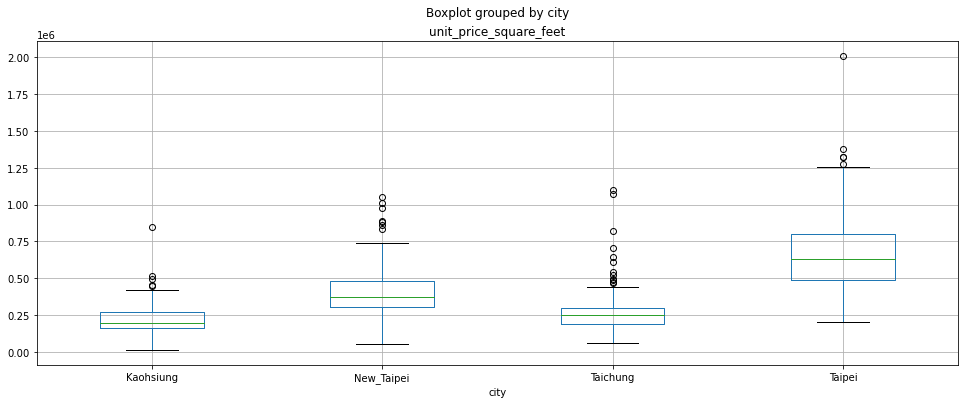

In [15]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
#台北市
analysis_data.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

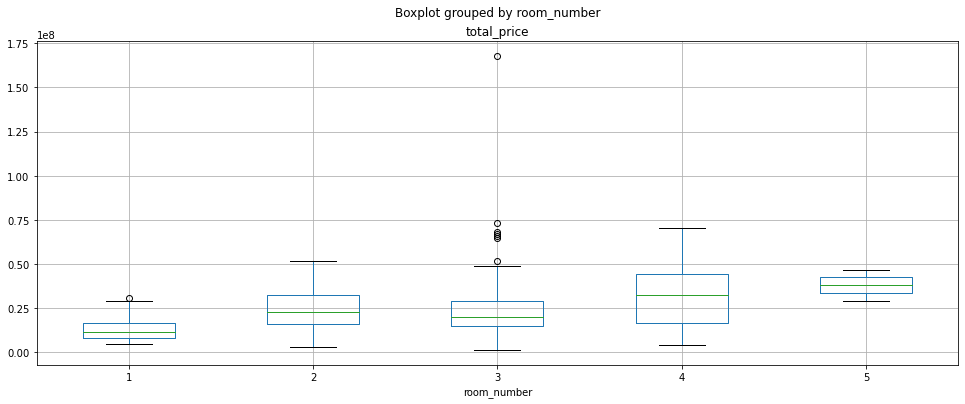

In [16]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
#5
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

In [17]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
#大安區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(analysis_data['towns'].values)
analysis_data['towns_2'] = le.transform(analysis_data['towns'].values)

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

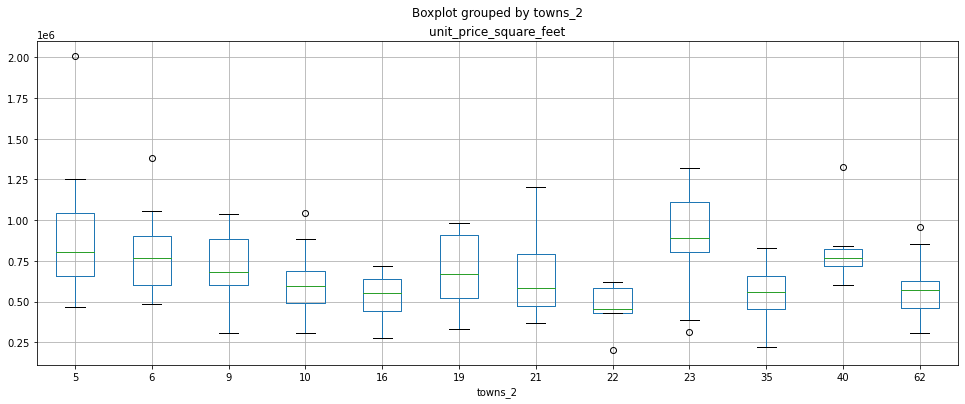

In [18]:
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(16,6))

In [19]:
le.inverse_transform([26])

array(['大甲區'], dtype=object)

In [20]:
analysis_data.head(20)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet,unit_price_square_feet_10K,towns_2
0,Taipei,北投區,住家用,住,60180000,339.77,138.94,1110802,177120.0,4,2,3,111,102.780425,42.029350,585520.661157,585.520661,16
1,Taipei,南港區,住家用,住,3800000,19.88,15.61,1110802,191147.0,4,2,2,111,6.013700,4.722025,631890.909091,631.890909,19
2,Taipei,文山區,住家用,住,8820000,43.01,24.69,1110804,205069.0,1,1,1,111,13.010525,7.468725,677914.049587,677.914050,35
3,Taipei,內湖區,住家用,住,16800000,97.34,51.86,1110802,172591.0,2,1,1,111,29.445350,15.687650,570548.760331,570.548760,10
4,Taipei,信義區,住家用,住,5375844,58.14,50.59,1110802,92464.0,3,2,2,111,17.587350,15.303475,305666.115702,305.666116,9
5,Taipei,北投區,住家用,住,12900000,65.19,48.91,1110801,197883.0,1,1,1,111,19.719975,14.795275,654158.677686,654.158678,16
6,Taipei,士林區,住家用,住,43000000,253.34,95.61,1110808,169732.0,3,2,2,111,76.635350,28.922025,561097.520661,561.097521,21
7,Taipei,士林區,住家用,住,6219700,33.00,33.00,1110801,188476.0,4,2,2,111,9.982500,9.982500,623061.157025,623.061157,21
8,Taipei,文山區,住家用,住,10600000,52.76,34.47,1110710,200910.0,1,1,1,111,15.959900,10.427175,664165.289256,664.165289,35
9,Taipei,中正區,住家用,住,44680000,178.96,101.78,1110701,249665.0,4,1,2,111,54.135400,30.788450,825338.842975,825.338843,6


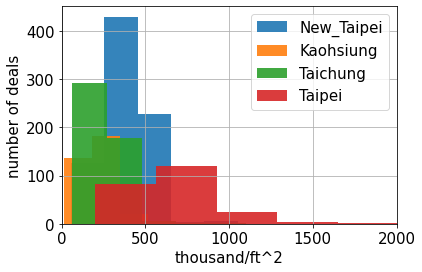

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15

for i in set(analysis_data['city']):
    i_district = analysis_data[analysis_data['city'] == i]
    i_district['unit_price_square_feet_10K'].hist(bins=5, alpha=0.9)

plt.xlim(0, 2000)
plt.xlabel('thousand/ft^2')
plt.ylabel('number of deals')
plt.legend(set(analysis_data['city']))